# Import des données

In [ ]:
!pip install keras
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import RNN
from keras import backend
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV,learning_curve,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,make_scorer

import math
import csv
import os
import operator
from tensorflow.keras import layers
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, f1_score
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import ConfusionMatrixDisplay

!pip install keras
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import RNN
from keras import backend
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import FreqDist
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV,learning_curve,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,make_scorer

from  nltk.stem import SnowballStemmer

import math
import re
import warnings
import html
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
import csv
import os
import operator
!pip install gensim --upgrade
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras import layers
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualisation des données :

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/french_tweets.csv', header=0)
df.head()
df

label                                               text
0            0  - Awww, c'est un bummer. Tu devrais avoir davi...
1            0  Est contrarié qu'il ne puisse pas mettre à jou...
2            0  J'ai plongé plusieurs fois pour la balle. A ré...
3            0  Tout mon corps a des démangeaisons et comme si...
4            0  Non, il ne se comporte pas du tout. je suis en...
...        ...                                                ...
1526719      1  Oui, cela fonctionne mieux que de l'attendre à...
1526720      1  Je viens de me réveiller. Ne pas avoir d'école...
1526721      1  Thewdb.com - très cool d'entendre les vieilles...
1526722      1  Êtes-vous prêt pour votre mojo makeover? Deman...
1526723      1  Joyeux 38ème anniversaire à mon livre de tous ...

[1526724 rows x 2 columns]

Text(0.5, 1.0, 'Distribution des sentiments')

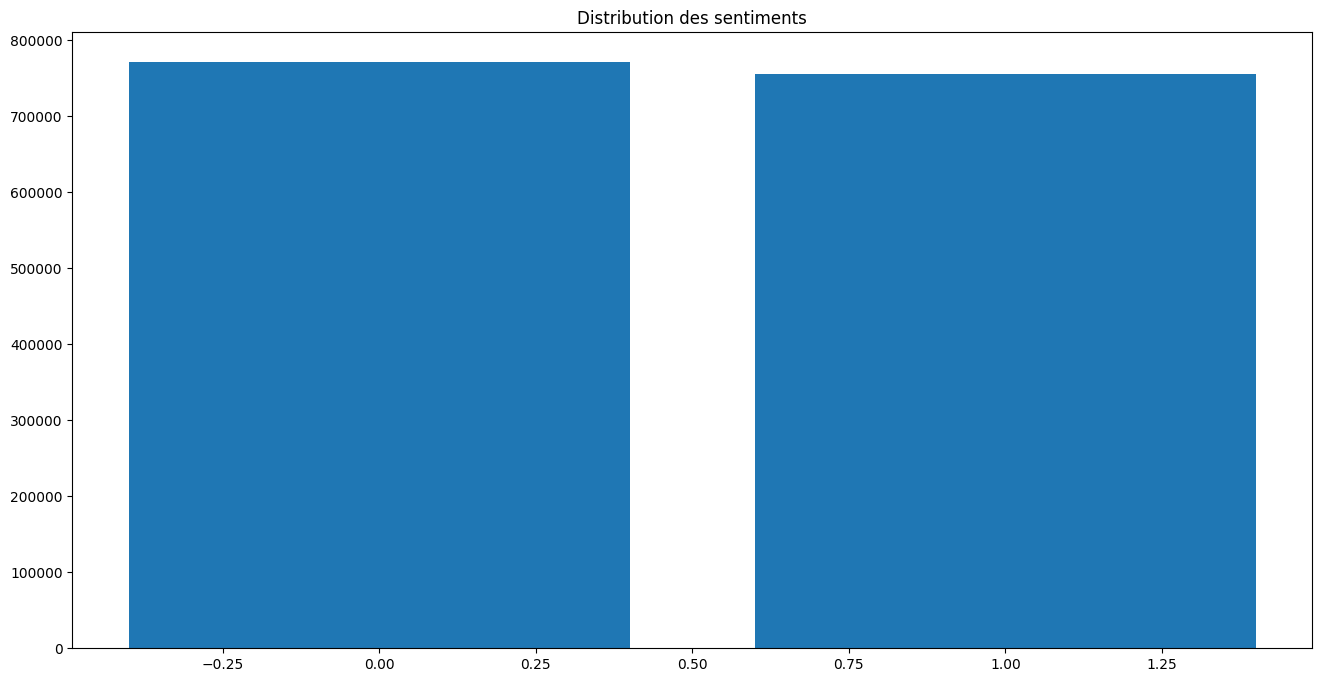

In [ ]:
df_count = Counter(df.label)

plt.figure(figsize=(16,8))
plt.bar(df_count.keys(), df_count.values())
plt.title("Distribution des sentiments")

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
df['label'].value_counts()

0    771604
1    755120
Name: label, dtype: int64

# Cleaning des données :

In [ ]:
# On clean le texte :
TEXT_CLEANING = "@\S+|https?:\S+|http?:\S|[^a-zA-Zàâçéèêëîïôùûüÿñæœ]+"
stemmer = SnowballStemmer("french")

In [ ]:

def preprocess(text, stem=False):

    # On enlève tout ce qui relève des caractères spéciaux

    text = re.sub(TEXT_CLEANING, ' ', str(text).lower()).strip()
    tokens = []

    for token in text.split():

      if stem:

        tokens.append(stemmer.stem(token))

      else:

        tokens.append(token)

    return " ".join(tokens)

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

In [ ]:
df

label                                               text
0            0  awww c est un bummer tu devrais avoir david ca...
1            0  est contrarié qu il ne puisse pas mettre à jou...
2            0  j ai plongé plusieurs fois pour la balle a réu...
3            0  tout mon corps a des démangeaisons et comme si...
4            0  non il ne se comporte pas du tout je suis en c...
...        ...                                                ...
1526719      1  oui cela fonctionne mieux que de l attendre à ...
1526720      1  je viens de me réveiller ne pas avoir d école ...
1526721      1  thewdb com très cool d entendre les vieilles i...
1526722      1  êtes vous prêt pour votre mojo makeover demand...
1526723      1  joyeux ème anniversaire à mon livre de tous le...

[1526724 rows x 2 columns]

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0    awww c est un bummer tu devrais avoir david ca...
1    est contrarié qu il ne puisse pas mettre à jou...
2    j ai plongé plusieurs fois pour la balle a réu...
3    tout mon corps a des démangeaisons et comme si...
4    non il ne se comporte pas du tout je suis en c...
Name: text, dtype: object

In [ ]:
(lines,cols) = df.shape
print(lines,cols)

1526724 2


## Nombre de mots moyen par Tweet :

In [ ]:
words = [str(df.iloc[i,1]).split() for i in range(lines)]
nb = [len(a) for a in words]
df["nb_mots"] = nb
df.head(10)

label                                               text  nb_mots
0      0  awww c est un bummer tu devrais avoir david ca...       17
1      0  est contrarié qu il ne puisse pas mettre à jou...       27
2      0  j ai plongé plusieurs fois pour la balle a réu...       17
3      0  tout mon corps a des démangeaisons et comme si...       13
4      0  non il ne se comporte pas du tout je suis en c...       25
5      0                             pas l équipage complet        4
6      0                                  besoin d un câlin        4
7      0  bonjour pas de vue oui pleut un peu juste un p...       19
8      0                           non ils ne l avaient pas        6
9      0                                           je meurs        2

In [ ]:
print("Il y a en moyenne " + str(df['nb_mots'].mean()) + " mots dans un tweet nettoyé")

Il y a en moyenne 14.531859065554743 mots dans un tweet nettoyé


In [ ]:
df=df.drop('nb_mots', axis=1)

# Splitting des Données en 80/20 :

In [ ]:
# On sépare X et y en deux datasets :

y = df.loc[:, df.columns != 'text']
X = df.loc[:, df.columns != 'label']  # Tout sauf le label.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tokenisation et Padding :

In [ ]:
from keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])

train_sequences = tokenizer.texts_to_sequences(X_train['text'])
test_sequences = tokenizer.texts_to_sequences(X_test['text'])

train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')

# Performance :

In [ ]:
def performance (y_test, pred_probabilities):
    # performance
    fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities)
    # compute roc auc
    roc_auc = roc_auc_score(y_test, pred_probabilities, average = 'micro')
    # compute Precision_Recall curves
    precision, recall, _ = precision_recall_curve(y_test, pred_probabilities)
    # compute PR_AUC
    pr_auc = metrics.auc(recall, precision)
    # I add confusion matrix
    optimal_cut_off = round(thresholds[np.argmax(tpr - fpr)],4)
    a = np.where(pred_probabilities > optimal_cut_off, 1, 0)
    brier = round(metrics.brier_score_loss(y_test, pred_probabilities, sample_weight=None, pos_label=None),3)
    predictions = np.where(pred_probabilities > optimal_cut_off, 1, 0)

    print ("Area Under ROC Curve: %0.2f" % roc_auc  )
    print ("Area Under PR Curve(AP): %0.2f" % pr_auc  )
    print("Brier score : {:.3f}".format(brier))
    print('Cut off: ' + str(optimal_cut_off))
    matrix = metrics.confusion_matrix(y_test, a, labels=None, normalize=None)
    print(str(matrix))

# Modèle :

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_padded.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 128)          66560     
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 dense_2 (Dense)             (None, 100, 1)            129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiler le modèle :

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting du modèle :

In [ ]:
# Adapter les données d'entraînement au modèle :

history = model.fit(train_padded, y_train, epochs=40, batch_size=1000, validation_split=0.2)

Epoch 1/40
978/978 [==============================] - 38s 36ms/step - loss: 0.6823 - accuracy: 0.5596 - val_loss: 0.6775 - val_accuracy: 0.5709
Epoch 2/40
978/978 [==============================] - 36s 37ms/step - loss: 0.6700 - accuracy: 0.5853 - val_loss: 0.6686 - val_accuracy: 0.5868
Epoch 3/40
978/978 [==============================] - 34s 35ms/step - loss: 0.6629 - accuracy: 0.5964 - val_loss: 0.6608 - val_accuracy: 0.5964
Epoch 4/40
978/978 [==============================] - 34s 35ms/step - loss: 0.6573 - accuracy: 0.6041 - val_loss: 0.6670 - val_accuracy: 0.5927
Epoch 5/40
978/978 [==============================] - 36s 37ms/step - loss: 0.6527 - accuracy: 0.6095 - val_loss: 0.6549 - val_accuracy: 0.6040
Epoch 6/40
978/978 [==============================] - 34s 34ms/step - loss: 0.6493 - accuracy: 0.6138 - val_loss: 0.6629 - val_accuracy: 0.6033
Epoch 7/40
978/978 [==============================] - 34s 35ms/step - loss: 0.6459 - accuracy: 0.6179 - val_loss: 0.6446 - val_accuracy:

## Evaluation du modèle :

Malheureusement, j'ai fait des modifications de modèles et vu que le GPU ne veut plus de moi sur google colab, je n'arriverai pas à faire assez d'époques pour obtenir la même acuracy ( sur le test ).

On voit que le modèle créé était assez performant !

In [ ]:
model.evaluate(test_padded, y_test)

9543/9543 [==============================] - 46s 5ms/step - loss: 0.6074 - accuracy: 0.6604


[0.6073911786079407, 0.6603519320487976]

In [ ]:
y_preds = model.predict(test_padded)

9543/9543 [==============================] - 43s 5ms/step


In [ ]:
np.shape(y_preds)

(305345, 100, 1)

Pour une sombre raison que je n'explique pas, y_preds a une shape particulière de (305345,100) au lieu de (305345,1).

En trifouillant un peu, je mesuis rendu compte que pour chaque ligne, il faisait 100 prédictions avec proba mais ne prenait pas la moyenne de ces prédictions comme prédicitons finales.

J'ai fait alors un mini bout de code ( rien de bien méchant ) pour avoir notre y_final de la bonne shape et avec les bonnes valeurs.

In [ ]:
y_final=[]

for i in range (y_preds.shape[0]):
  m=np.mean(y_preds[i])
  y_final.append(m)

y_final=np.asarray(y_final)

In [ ]:
y_final

array([0.37951046, 0.6981138 , 0.5732598 , ..., 0.7477763 , 0.60855   ,
       0.4350097 ], dtype=float32)

## Courbe Accuracy :

Text(0.5, 1.0, 'Train - Accuracy')

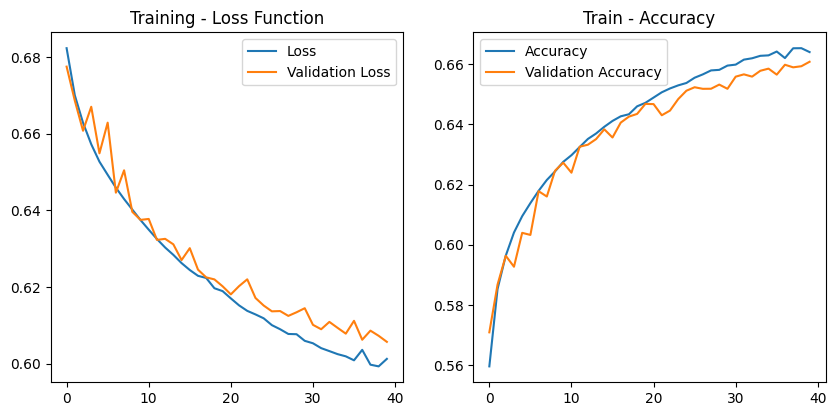

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## ARea Under ROC Curve, Brier Score et MAtrice de Confusion :

In [ ]:
performance(y_test,y_final)

Area Under ROC Curve: 0.74
Area Under PR Curve(AP): 0.72
Brier score : 0.207
Cut off: 0.4956
[[ 98367  55757]
 [ 44861 106360]]


# Analyse et commentaires :

On a un modèle qui est relativement performant, après on voit qu'on aurait pu le pousser un peu plus loin, peut être jusqu'a 72-75%.

En ce qui concerne l'autre modèle que nous avions créé pour tweet précédemment, je pense que nous aurions besoin pour être plus performant de faire un Embedding mais on a pas du tout assez de RAM disponible pour faire tourner un modèle si gros ( en testant avec le Embedding on arrive a un nombre de paramètres énorme pour notre pauvre machine, de l'ordre de facilement 20'000'000 de paramètres ou plus )